# ASSIGNMENT ON CLASSIFICATION


###Import required libraries

In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score,accuracy_score,precision_score,recall_score,f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

###Read the dataset to python environment

In [43]:
iris=pd.read_excel('/content/iris.xls')

In [44]:
iris

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,NaN,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


###PRE-PROCESSING

##Checking basic information

In [45]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              143 non-null    float64
 1   SW              144 non-null    float64
 2   PL              144 non-null    float64
 3   PW              150 non-null    float64
 4   Classification  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB



There are null values present in 3 columns - SL, SW and PL. And all predictor variables are numerical and only target variable is categorical

In [46]:
iris.isnull().sum()

SL                7
SW                6
PL                6
PW                0
Classification    0
dtype: int64

## Check distribution type of columns containing null values

In [47]:
for i in ['SL','SW','PL']:
    print('Skewness value of column', i ,'=', iris[i].skew())

Skewness value of column SL = 0.3068227108046868
Skewness value of column SW = 0.37781843718771746
Skewness value of column PL = -0.2689053923783847


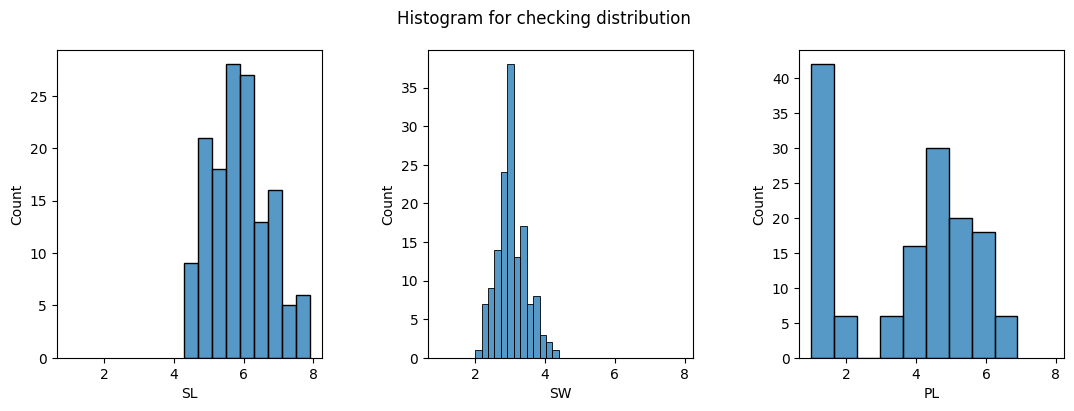

In [49]:
fig,axes = plt.subplots(1, 3, sharex=True,figsize=(13, 4))
plt.suptitle('Histogram for checking distribution')
sns.histplot(iris.SL,ax=axes[0])
sns.histplot(iris.SW,ax=axes[1])
sns.histplot(iris.PL,ax=axes[2])
plt.subplots_adjust(wspace=0.4)
plt.show()

All distributions are skewed.So median can be used

Filling the null values

In [50]:
for i in ['SL','SW','PL']:
  iris[i]=iris[i].fillna(iris[i].median())

In [51]:
iris.isnull().sum()

SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

All null values are imputed properly

###Boxplot for checking outliers

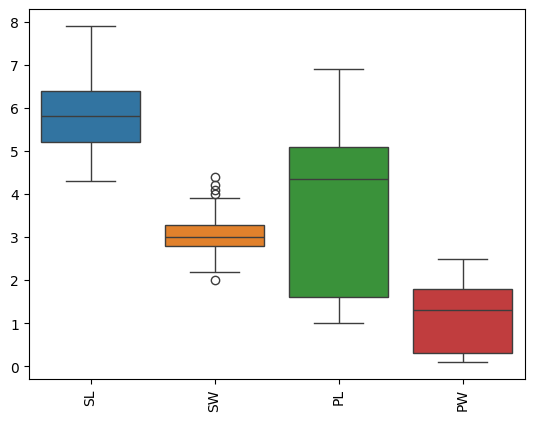

In [52]:
sns.boxplot(iris[['SL','SW','PL','PW']])
plt.xticks(rotation=90)
plt.show()

Only column SW contains outliers. Since it is a skewed distribution, use IQR method for outlier detection

###IQR method for outlier detection

In [53]:
Q1=np.percentile(iris['SW'],25,method='midpoint')
Q2=np.percentile(iris['SW'],50,method='midpoint')
Q3=np.percentile(iris['SW'],75,method='midpoint')

In [54]:
print("Q1 is:",Q1)
print("Q2 is:",Q2)
print("Q3 is:",Q3)

Q1 is: 2.8
Q2 is: 3.0
Q3 is: 3.25


In [55]:
IQR=Q3-Q1
print(IQR)

0.4500000000000002


In [56]:
 low_lim=Q1-1.5*IQR
 up_lim=Q3+1.5*IQR
 outliers=[]

In [57]:
for x in iris['SW']:
  if((x<low_lim)or(x>up_lim)):
    outliers.append(x)
    print(outliers)

[4.0]
[4.0, 4.4]
[4.0, 4.4, 4.1]
[4.0, 4.4, 4.1, 4.2]
[4.0, 4.4, 4.1, 4.2, 2.0]


Outlier handling using clip function

In [58]:
iris['SW']=iris['SW'].clip(lower=low_lim,upper=up_lim)

In [59]:
outliers=[]
for x in iris['SW']:
  if((x<low_lim)or(x>up_lim)):
    outliers.append(x)


In [60]:
print(outliers)

[]


Check again for outliers using boxplot

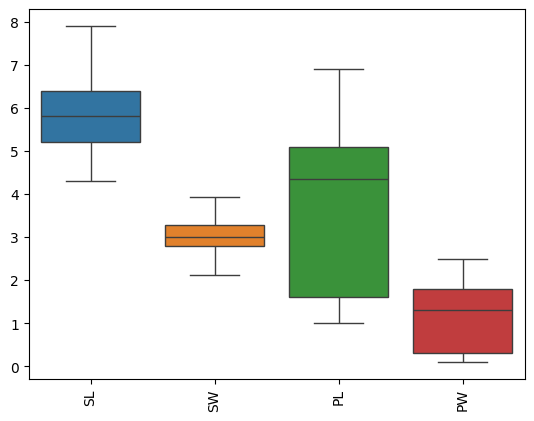

In [61]:
sns.boxplot(iris[['SL','SW','PL','PW']])
plt.xticks(rotation=90)
plt.show()

Now, there are all outliers removed from  the dataset.

###Label encoding

In [62]:
le=LabelEncoder()

In [63]:
iris.Classification=le.fit_transform(iris.Classification)


In [64]:
iris

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.40,0.2,0
1,4.9,3.0,1.40,0.2,0
2,5.8,3.2,1.30,0.2,0
3,4.6,3.1,1.50,0.2,0
4,5.0,3.6,1.40,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.20,2.3,2
146,6.3,2.5,5.00,1.9,2
147,6.5,3.0,4.35,2.0,2
148,6.2,3.4,5.40,2.3,2


In [65]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              150 non-null    float64
 1   SW              150 non-null    float64
 2   PL              150 non-null    float64
 3   PW              150 non-null    float64
 4   Classification  150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


Now all columns became numerical columns.

###Correlation

<Axes: >

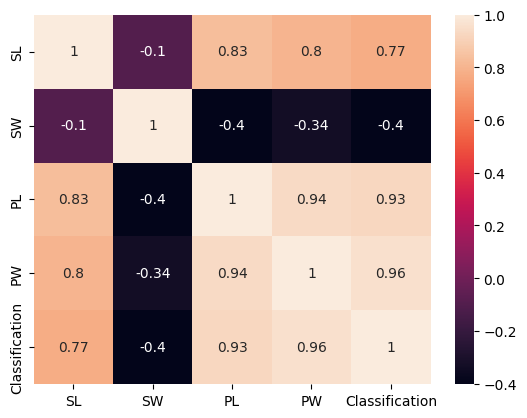

In [66]:
sns.heatmap(iris.corr(),annot=True)

 PL and PW Columns has  high positive correlation of 0.94. Also, both of them shows a high positive correlation with target variable. So we are not dropping any of them (size of dataset is low).

###CLASSIFICATION

Target variable/ dependent variable, y = Classification

Predictor variable/ independent variable, x = SL, SW, PL and PW

**Differentiate x, y and split train, test**

In [80]:
x=iris.drop('Classification',axis=1)
y=iris['Classification']
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=555,test_size=0.1)

###Logistic Regression

In [81]:
log_reg=LogisticRegression(max_iter=10000)
log_reg.fit(x_train,y_train)
log_reg_pred=log_reg.predict(x_test)
print('Accuracy of Logistic Regression Model', accuracy_score(y_test,log_reg_pred))
print('Precision of Logistic Regression Model', precision_score(y_test,log_reg_pred,average='weighted'))
print('Recall of Logistic Regression Model:',recall_score(y_test,log_reg_pred,average='weighted'))
print('F1 score of Logistic Regression Model', f1_score(y_test,log_reg_pred,average='weighted'))

Accuracy of Logistic Regression Model 0.8
Precision of Logistic Regression Model 0.92
Recall of Logistic Regression Model: 0.8
F1 score of Logistic Regression Model 0.826959706959707


###K Nearest Neighbor (KNN)

# To Choose k value

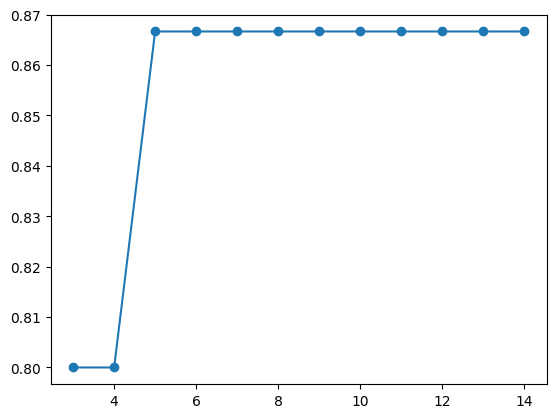

In [82]:
metric_k=[]
neighbors=np.arange(3,15)
for k in neighbors:
    classifier=KNeighborsClassifier(n_neighbors=k,metric='euclidean')
    classifier.fit(x_train,y_train)
    knn_pred=classifier.predict(x_test)
    metric_k.append(accuracy_score(y_test,knn_pred))
plt.plot(neighbors,metric_k,'o-')
plt.show()

High accuracy got for k values 5 - 14. So choose k as 6 and do classification.

In [89]:
classifier=KNeighborsClassifier(n_neighbors=6,metric='euclidean')
classifier.fit(x_train,y_train)
knn_pred=classifier.predict(x_test)
print('Accuracy of KNN Classifier', accuracy_score(y_test,knn_pred))
print('Precision of KNN Classifier', precision_score(y_test,knn_pred,average='weighted'))
print('Recall of KNN Classifier:',recall_score(y_test,knn_pred,average='weighted'))
print('F1 score of KNN Classifier', f1_score(y_test,knn_pred,average='weighted'))

Accuracy of KNN Classifier 0.8666666666666667
Precision of KNN Classifier 0.9333333333333333
Recall of KNN Classifier: 0.8666666666666667
F1 score of KNN Classifier 0.8832944832944832


###Support Vector Machine (SVM)

In [85]:
sv_clf=SVC(kernel='linear')
sv_clf.fit(x_train,y_train)
svm_pred=sv_clf.predict(x_test)
print('Accuracy of SVM Classifier', accuracy_score(y_test,svm_pred))
print('Precision of SVM Classifier', precision_score(y_test,svm_pred,average='weighted'))
print('Recall of SVM Classifier:',recall_score(y_test,svm_pred,average='weighted'))
print('F1 score of SVM Classifier', f1_score(y_test,svm_pred,average='weighted'))

Accuracy of SVM Classifier 0.9333333333333333
Precision of SVM Classifier 0.9555555555555556
Recall of SVM Classifier: 0.9333333333333333
F1 score of SVM Classifier 0.936969696969697


###Decision Tree

In [86]:
dt_clf=DecisionTreeClassifier(max_depth=50,criterion='entropy',min_samples_leaf=5)
dt_clf.fit(x_train,y_train)
dt_pred=dt_clf.predict(x_test)
print('Accuracy of Decision Tree Classifier', accuracy_score(y_test,dt_pred))
print('Precision of Decision Tree Classifier', precision_score(y_test,dt_pred,average='weighted'))
print('Recall of Decision Tree Classifier:',recall_score(y_test,dt_pred,average='weighted'))
print('F1 score of Decision Tree Classifier', f1_score(y_test,dt_pred,average='weighted'))

Accuracy of Decision Tree Classifier 0.9333333333333333
Precision of Decision Tree Classifier 0.9555555555555556
Recall of Decision Tree Classifier: 0.9333333333333333
F1 score of Decision Tree Classifier 0.936969696969697


###Random Forest

In [87]:
rf_clf=RandomForestClassifier(criterion='gini',min_samples_split=3,min_samples_leaf=5,max_features='sqrt')
rf_clf.fit(x_train,y_train)
rf_pred=rf_clf.predict(x_test)
print('Accuracy of Random Forest Classifier', accuracy_score(y_test,rf_pred))
print('Precision of Random Forest Classifier', precision_score(y_test,rf_pred,average='weighted'))
print('Recall of Random Forest Classifier:',recall_score(y_test,rf_pred,average='weighted'))
print('F1 score of Random Forest Classifier', f1_score(y_test,rf_pred,average='weighted'))

Accuracy of Random Forest Classifier 0.8666666666666667
Precision of Random Forest Classifier 0.9333333333333333
Recall of Random Forest Classifier: 0.8666666666666667
F1 score of Random Forest Classifier 0.8755555555555556



###Comparison Between Different Classification Models


In [88]:
mux = pd.MultiIndex.from_product([['Logistic Regression','KNN','SVM','Decision Tree','Random Forest']])
Metric=['Accuracy','Precision','Recall','F1 score']
comp_table = pd.DataFrame([[accuracy_score(y_test,log_reg_pred),accuracy_score(y_test,knn_pred),accuracy_score(y_test,svm_pred),accuracy_score(y_test,dt_pred),accuracy_score(y_test,rf_pred)],[precision_score(y_test,log_reg_pred,average='weighted'),precision_score(y_test,knn_pred,average='weighted'),precision_score(y_test,svm_pred,average='weighted'),precision_score(y_test,dt_pred,average='weighted'),precision_score(y_test,rf_pred,average='weighted')],[recall_score(y_test,log_reg_pred,average='weighted'),recall_score(y_test,knn_pred,average='weighted'),recall_score(y_test,svm_pred,average='weighted'),recall_score(y_test,dt_pred,average='weighted'),recall_score(y_test,rf_pred,average='weighted')],[f1_score(y_test,log_reg_pred,average='weighted'),f1_score(y_test,knn_pred,average='weighted'),f1_score(y_test,svm_pred,average='weighted'),f1_score(y_test,dt_pred,average='weighted'),f1_score(y_test,rf_pred,average='weighted')]], columns=mux)
comp_table.index=Metric
comp_table

,Logistic Regression,KNN,SVM,Decision Tree,Random Forest
Accuracy,0.80000,0.866667,0.933333,0.933333,0.866667
Precision,0.92000,0.933333,0.955556,0.955556,0.933333
Recall,0.80000,0.866667,0.933333,0.933333,0.866667
F1 score,0.82696,0.883294,0.936970,0.936970,0.875556


OBSERVATION:Here in this classification problem, SVM and Decision Tree classifiers possess high evaluation metric values. KNN and Random Forest classifiers comes next. Logistic Regression shows least metric values.